# WATERSHED

##### MEDICAL IMAGE ANALYSIS
##### Degree in Biomedical Engineering
##### Course 2020/2021


<div class="alert alert-block alert-danger">
<b>Authors:</b> $$Raúl \quad López \quad González$$ <br>
$$Hugo \quad Calero \quad Diaz$$ <br>
$$Pablo \quad Laso \quad Mielgo$$

</div>

The **Watershed algorithm** assumes that the different objects in the image are represented as if they were a valley. It has been granted such name becasue of its ideal procedure:
<br>
$\rightarrow$ In the event of a flood, the local minima will fill up first, while the maxima will separate several minima (or "valleys"). In other words, the edges of each object are the upper elevations while the interior of the object is the bottom of the valley.
<br>
Hence, if we use the gradient as the image function,  we will have that the borders or local maxima correspond to the **edges**!
<p>
When two regions meet, the edge is overcome and a diciding boundary is generated. In order to avoid over-segmentaion, there exists several implementations:

* Union of **neighboring regions** that share a certain criterion (methodology
similar to split and merge).
* Applying a **smoothing filter** prior to applying the algorithm to reduce noise.
* Define the regions that will be generated by establishing a series of **seeds** from where the process will start.
    
---

## SEGMENTATION OF THE SUPERIOR SAGITTAL SINUS *

####  * (Small black space at the back of the brain where the 2 hemispheres connect)

In [3]:
# Modules that we use in this practice

from skimage import io
import numpy as np
%pylab inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import scipy.ndimage.filters as filters
from skimage.filters import sobel
import os
from pydicom import dcmread
import imimposemin as im
from skimage.segmentation import watershed
from Exercise2 import submatrix, RegionGrowingP2, WatershedP2

Populating the interactive namespace from numpy and matplotlib


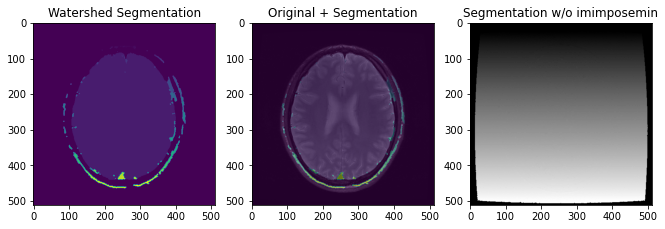

In [2]:
a, b, c = WatershedP2("IM-0003-0023.dcm", [(430,250)], "dicom")

## SEGMENTATION OF BRAIN FLUID

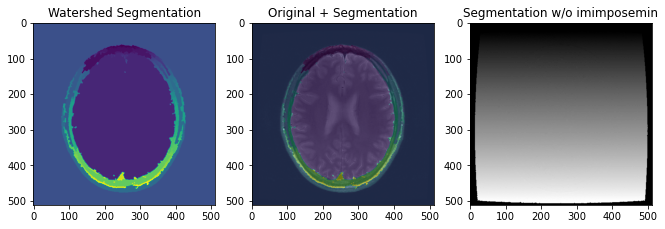

In [3]:
a,b,c = WatershedP2("IM-0003-0023.dcm", [(250, 105)], "dicom")

## SEGMENTATION OF THE VENTRICLES

### WITH MULTIPLE SEEDS

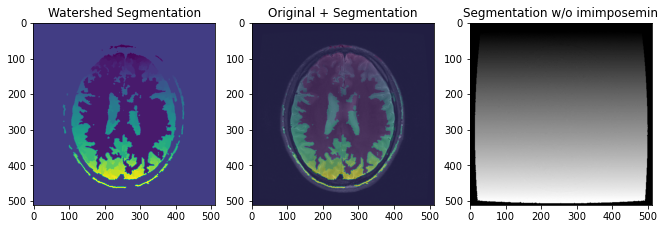

In [4]:
a, b, c = WatershedP2("IM-0003-0023.dcm", [(220,220), (280, 280)], "dicom")

### WITH A SINGLE SEED

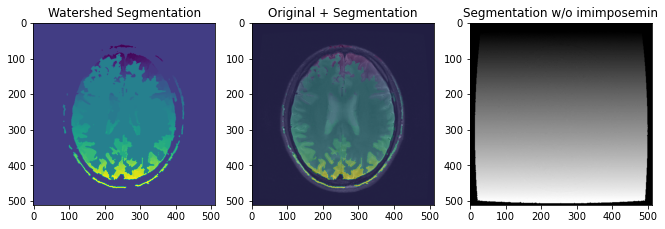

In [5]:
a, b, c= WatershedP2("IM-0003-0023.dcm", [(220,220)], "dicom")

**1) Comment on the characteristics of the masks, both at the level of elements stored in the matrix,
and graphically on the gradient image. What does each color level represent in the masks?**

The different levels of gray of the mask correspond to different valleys with their corresponding depth. The higher values (closer to white than black/higher values) are going to represent the points of separation between the valleys (blacker/lower values). The first valley to be flooded is going to be the one where our local minima is localized, that has been established with the imimposemin function. Once this first valley is flooded, the local maxima (edges) are reached and the next most deep valley is flooded. This is done until all the valleys have been flooded.

**2) Discuss the differences between the two masks. Explain the reason for the gradient obtained in the
representation of the seedless mask, and what we achieved when we introduced it.**

When we implement the watershed algorithm to the image to which the derivative filter has been done, without imposing our local minima of interest, we will flood the whole image at the same time, as the level of depth is the same over the entire image. As a result the segmentation is just an homogeneous image.

On the other hand, when we impose the points of interest as minima we also modify the level of gray (depth) of the rest of the image. Doing so permits the algorithm to distinguish between different levels of depth, leading to the correct segmentation.

**3) Explain why we used the gradient image at the input of the watershed, and not the original image.**

The **Watershed algorithm** assumes that the different objects in the image are represented as if they were a valley. It has been granted such name becasue of its ideal procedure:
<br>
$\rightarrow$ In the event of a flood, the local minima will fill up first, while the maxima will separate several minima (or "valleys"). In other words, the edges of each object are the upper elevations while the interior of the object is the bottom of the valley.
<br>
Hence, if we use the gradient as the image function,  we will have that the borders or local maxima correspond to the **edges**.

**4) Comment on the results obtained by introducing different numbers of seeds in different positions
of the image. Is there any other way to improve the quality of targeting?**

In the previous example, we try to segment the ventricles and gray matter, that have similar gray values in contrast to the white matter of the brain.

In the first one we impose 2 different seeds, each one localized in one of the ventricles. On the next example we just apply one of the previous seeds. We can observe how the quality of the segmentation decreases notably from one example to the next.

This happens because we are giving more information to the algorithm, and as we are imposing two local minima instead of only one, it will be more efficient to localize similar values. When we impose one single seed, we give less importance to the other ventricle, as it value will be modified (to minimize the position of the seed) and the algorithm will not detect it correctly as part of our region of interest.

A way of enhancing the performance of the algorithm is to correctly preprocess the image, by remoivng the existing noise. In this way, the range of gray values of every differentiable anatomical structure will be better defined, and the algorithm will work more precisely.

---
HRL